In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

#### data source: cs229 assignment1 ds2_train.csv
(https://piazza.com/class/jkbylqx4kcp1h3?cid=151)

In [4]:
data_2 = pd.read_csv('E://courses//cs229//cs229-ps-2018-master//ps1//data//ds2_train.csv', index_col=False)


In [5]:
data_2.head()

,x1,x2,y
0,3.759481,7.507940,0
1,3.422057,4.991203,0
2,2.778818,4.112071,0
3,4.018066,5.653732,0
4,1.806062,4.685966,0


In [6]:
data_2.shape

(800, 3)

### Data Visualization


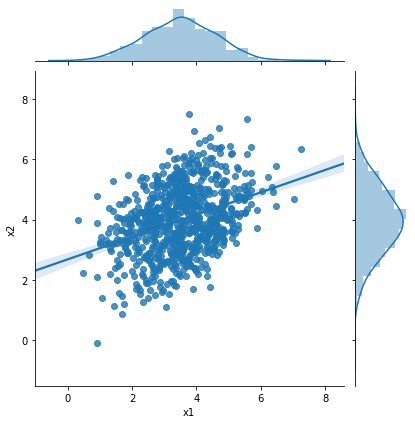

In [7]:
sns.jointplot(data_2['x1'], data_2['x2'],kind = "reg")

### Build a linear regression  using Scikit

In [8]:
lrmodel =  linear_model.LinearRegression()

In [9]:
lrmodel.fit(data_2['x1'].values.reshape(-1,1),data_2['x2'])  
#x.values.reshape(-1,1),since x is 1-D

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
w, b = lrmodel.coef_, lrmodel.intercept_
print(" The coefficient is ",w," and the intercept here is",b)

 The coefficient is  [0.36979608]  and the intercept here is 2.6832961734376446


Testing the model

In [11]:
lrmodel.score(data_2['x1'].values.reshape(-1,1),data_2['x2']) 

0.13086266035559435

score too low, this might not be a good model

### Lasso/Ridge Regression
use the sklearn in python

* L1: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

* L2: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

#### Lasso:

In [21]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(data_2['x1'].values.reshape(-1,1),data_2['x2'])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
w1, b1 = lasso.coef_, lasso.intercept_
print(" The coefficient is ",w1," and the intercept here is",b1)

 The coefficient is  [0.28596407]  and the intercept here is 2.9765546058715455


In [27]:
lasso.score(data_2['x1'].values.reshape(-1,1),data_2['x2']) 

0.12413737218493082

#### Ridge:

In [36]:
Ridge = linear_model.Ridge(alpha=2)
Ridge.fit(data_2['x1'].values.reshape(-1,1),data_2['x2'])

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [37]:
w2, b2 = Ridge.coef_, Ridge.intercept_
print(" The coefficient is ",w2," and the intercept here is",b2)

 The coefficient is  [0.36902268]  and the intercept here is 2.6860016487341585


In [38]:
Ridge.score(data_2['x1'].values.reshape(-1,1),data_2['x2']) 

0.13086208795902

### Locally Weighted Regression
See in p05c_tau.py and ds5_train.csv in cs229 ps1